## Summary
Notes for sections:

 * 01-01 Reading and plotting stock data
 * 01-02 Working with multiple stocks
 * 01-03 The power of numpy
 * 01-04 Statistical analysis of time series
 * 01-05 Incomplete data
 * 01-06 Histograms and scatterplots
 * 01-07 Sharpe ratio and other portfolio statistics
 * 01-08 Optimzers: Building a parameterized model
 * 01-09 Optimzers: How to optimze a portfolio

## Version Control

In [81]:
%run ../../../code/version_check.py

Python: 3.5.3 |Continuum Analytics, Inc.| (default, Feb 22 2017, 21:13:27) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]

matplotlib:	2.0.0
numpy:		1.12.0
pandas:		0.19.2
quandl:		3.0.1
sklearn:	0.18.1
scipy:		0.18.1
statsmodels:	0.8.0


## Change Log
    Date Created: 2017-02-28
    
    Date of Change    Change Notes
    --------------    ----------------------------------------------------------------
    2017-02-28        Initial draft


## Setup

Import needed modules and establish control variables.

In [251]:
%matplotlib inline

import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web

The `dates` variable will be a `datetime index` used for joining the time series we download.

In [11]:
start_date = datetime.datetime(1999, 1, 1)
end_date = datetime.datetime(2017, 2, 27)
dates = pd.date_range(start_date, end_date)

Used for formatting of charts

In [174]:
mpl.rcParams['figure.figsize'] = (12., 3.)
mpl.rcParams['grid.linestyle'] = 'dashed'

We download `spy` to use as a benchmark, and also as a reference point to determine if the market is open. It's generally safe to say that if the market was open, then `spy` would have been traded.

The time series are downloaded into their own dataframe, as opposed to using the `pandas.datareader` functionality to download into a panel.

In [12]:
spy = web.DataReader("SPY", 'yahoo', start_date, end_date)
aapl = web.DataReader("AAPL", 'yahoo', start_date, end_date)
ibm = web.DataReader("IBM", 'yahoo', start_date, end_date)

## Inspection

We see that:
 
 * All three series have the same number of observations: 4,566
 * Approximately 250 KB is used for each dataset

In [7]:
print(spy.info())
print(spy.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4566 entries, 1999-01-04 to 2017-02-24
Data columns (total 6 columns):
Open         4566 non-null float64
High         4566 non-null float64
Low          4566 non-null float64
Close        4566 non-null float64
Volume       4566 non-null int64
Adj Close    4566 non-null float64
dtypes: float64(5), int64(1)
memory usage: 249.7 KB
None
                Open        High         Low       Close   Volume  Adj Close
Date                                                                        
1999-01-04  123.3750  125.218697  121.718697  123.031197  9450400  88.568877
1999-01-05  122.9375  124.875000  122.937500  124.437500  8031000  89.581260
1999-01-06  125.8125  127.750000  125.750000  127.437500  7737700  91.740929
1999-01-07  126.3750  127.218697  125.781197  126.812500  5504900  91.290998
1999-01-08  128.1875  128.500000  125.968697  127.750000  6224400  91.965894


In [8]:
print(aapl.info())
print(aapl.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4566 entries, 1999-01-04 to 2017-02-24
Data columns (total 6 columns):
Open         4566 non-null float64
High         4566 non-null float64
Low          4566 non-null float64
Close        4566 non-null float64
Volume       4566 non-null int64
Adj Close    4566 non-null float64
dtypes: float64(5), int64(1)
memory usage: 249.7 KB
None
                 Open       High        Low      Close     Volume  Adj Close
Date                                                                        
1999-01-04  42.125000  42.249999  40.000001  41.250000  238221200   1.336083
1999-01-05  41.937499  43.937501  41.499999  43.312500  352528400   1.402887
1999-01-06  44.124999  44.124999  41.000000  41.750001  337142400   1.352278
1999-01-07  42.249999  45.062500  42.125000  44.999999  357254800   1.457545
1999-01-08  46.562501  46.875001  43.999999  44.999999  169708000   1.457545


In [9]:
print(ibm.info())
print(ibm.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4566 entries, 1999-01-04 to 2017-02-24
Data columns (total 6 columns):
Open         4566 non-null float64
High         4566 non-null float64
Low          4566 non-null float64
Close        4566 non-null float64
Volume       4566 non-null int64
Adj Close    4566 non-null float64
dtypes: float64(5), int64(1)
memory usage: 249.7 KB
None
                Open     High       Low     Close   Volume  Adj Close
Date                                                                 
1999-01-04  185.0000  186.500  181.5000  183.0000  8149600  68.896421
1999-01-05  183.0000  189.875  182.8125  189.6250  9907600  71.390622
1999-01-06  190.3125  192.750  188.5000  188.7500  9539600  71.061199
1999-01-07  187.9375  192.375  187.0000  190.1875  8306800  71.602393
1999-01-08  191.0000  192.000  185.6250  187.5625  9176800  70.614125


## Join the data

In [146]:
# create empty dataframe with datetime index set
df = pd.DataFrame(index=dates)

# add spy 'Adj Close' column and rename to the column to 'spy'
df = df.join(spy['Adj Close'], how='inner')
df = df.rename(columns={'Adj Close': 'spy'})

# review changes
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4566 entries, 1999-01-04 to 2017-02-24
Data columns (total 1 columns):
spy    4566 non-null float64
dtypes: float64(1)
memory usage: 71.3 KB
None


,spy
1999-01-04,88.568877
1999-01-05,89.581260
1999-01-06,91.740929
1999-01-07,91.290998
1999-01-08,91.965894


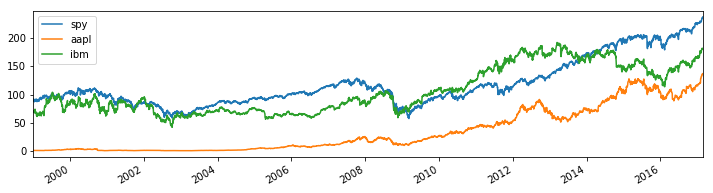

In [148]:
# add aapl and ibm
df['aapl'], df['ibm'] =  aapl['Adj Close'], ibm['Adj Close']

# visualise the price data
df.plot()

## Prepare the dataset for analysis


Use forward fill first before backfill. This is done to prevent data from the future creeping into past results. We only use the backfill to allow for time series that start part-way through the defined index time window to have the start of their data series aligned with the rest of the data.

In [151]:
# fill gaps
df.fillna(method='ffill')
df.fillna(method='bfill')

# normalise the price data
df = df / df.ix[0]

#  review changes
df.head()

,spy,aapl,ibm
1999-01-04,1.000000,1.000000,1.000000
1999-01-05,1.011430,1.050000,1.036202
1999-01-06,1.035815,1.012121,1.031421
1999-01-07,1.030735,1.090909,1.039276
1999-01-08,1.038355,1.090909,1.024932


Total return = 277.40%


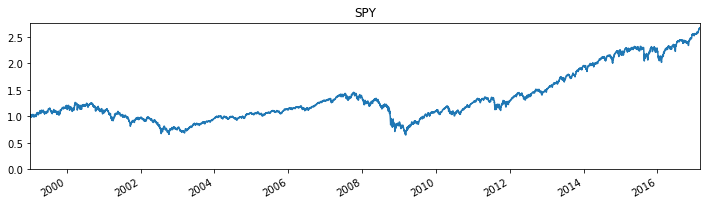

In [152]:
# generate plot
df['spy'].plot(title='SPY')

# set y-axis minimum value
# this call outputs a tuple of the y-min and y-max, we can
# use the y-max for display purposes
_, total_return = plt.ylim(ymin=0)
print('Total return = {:,.2f}%'.format(total_return * 100))

Total return = 10,772.01%


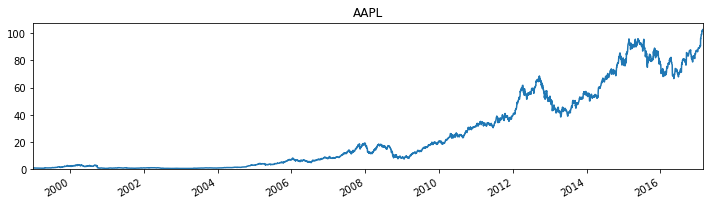

In [153]:
# generate plot
df['aapl'].plot(title='AAPL')

# set y-axis minimum value
# this call outputs a tuple of the y-min and y-max, we can
# use the y-max for display purposes
_, total_return = plt.ylim(ymin=0)
print('Total return = {:,.2f}%'.format(total_return * 100))

Total return = 289.67%


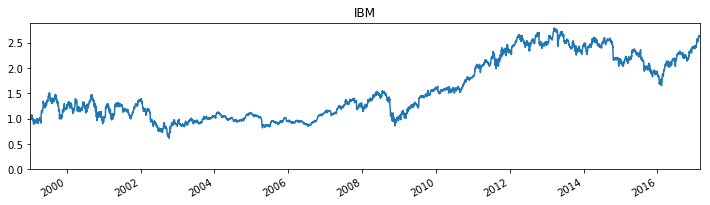

In [154]:
# generate plot
df['ibm'].plot(title='IBM')

# set y-axis minimum value
# this call outputs a tuple of the y-min and y-max, we can
# use the y-max for display purposes
_, total_return = plt.ylim(ymin=0)
print('Total return = {:,.2f}%'.format(total_return * 100))

When viewing the series all together we can see the easily see the outsized gains `aapl` had compartive to the market (`spy`) and `ibm`.

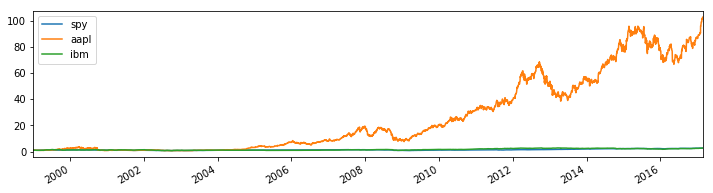

In [155]:
# generate plot
df.plot()

## Daily returns statistical analysis

In [161]:
daily_returns = df.pct_change()
daily_returns.dropna(inplace=True)
daily_returns.head()

,spy,aapl,ibm
1999-01-05,0.011430,0.050000,0.036202
1999-01-06,0.024108,-0.036075,-0.004614
1999-01-07,-0.004904,0.077844,0.007616
1999-01-08,0.007393,0.000000,-0.013802
1999-01-11,-0.009541,0.019444,0.008997


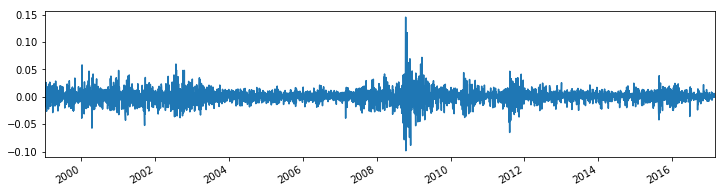

In [208]:
daily_returns['spy'].plot()

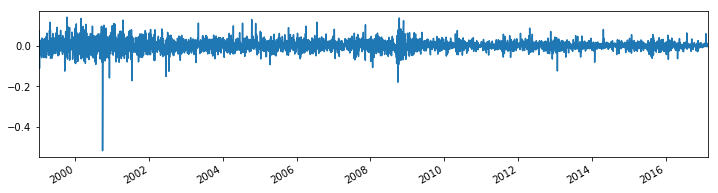

In [209]:
daily_returns['aapl'].plot()

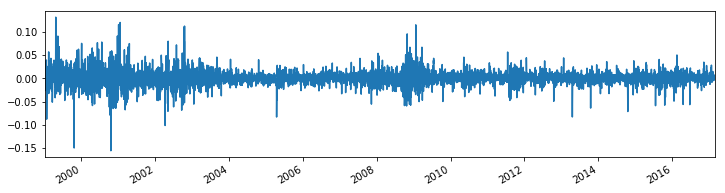

In [210]:
daily_returns['ibm'].plot()

In [168]:
mean = daily_returns.mean()
mean

spy     0.000292
aapl    0.001406
ibm     0.000361
dtype: float64

In [170]:
std = daily_returns.std()
std

spy     0.012405
aapl    0.027377
ibm     0.017273
dtype: float64

In [169]:
# the mean series object can be still be indexed into using the series name
mean['spy']

0.00029225033030730324

In [202]:
# global min and max, using '.values' converts to a numpy array
min = daily_returns.values.min()
max = daily_returns.values.max()

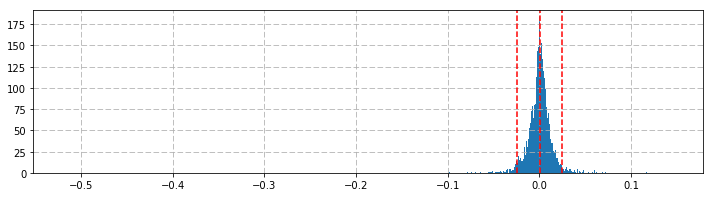

In [213]:
# plot returns distribution and mark with the mean and 2 std. dev.
series = 'spy'
daily_returns[series].hist(bins=1000, range=[min, max], align='mid')

# mean
plt.axvline(mean[series], color='r', linestyle='dashed')

# upper deviation
plt.axvline(mean[series] + std[series] * 2, color='r', linestyle='dashed')

# lower deviation
plt.axvline(mean[series] - std[series] * 2, color='r', linestyle='dashed')

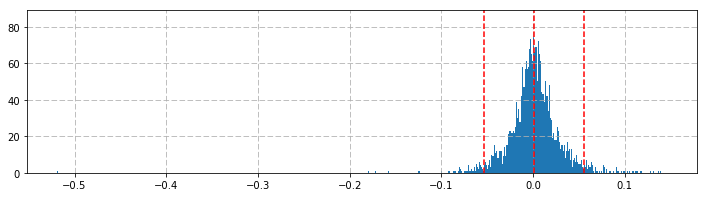

In [212]:
series = 'aapl'
daily_returns[series].hist(bins=1000, range=[min, max], align='mid')
plt.axvline(mean[series], color='r', linestyle='dashed')
plt.axvline(mean[series] + std[series] * 2, color='r', linestyle='dashed')
plt.axvline(mean[series] - std[series] * 2, color='r', linestyle='dashed')

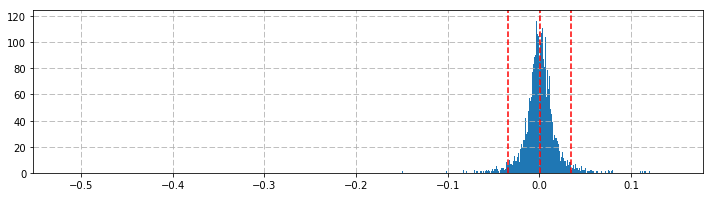

In [211]:
series = 'ibm'
daily_returns[series].hist(bins=1000, range=[min, max], align='mid')
plt.axvline(mean[series], color='r', linestyle='dashed')
plt.axvline(mean[series] + std[series] * 2, color='r', linestyle='dashed')
plt.axvline(mean[series] - std[series] * 2, color='r', linestyle='dashed')

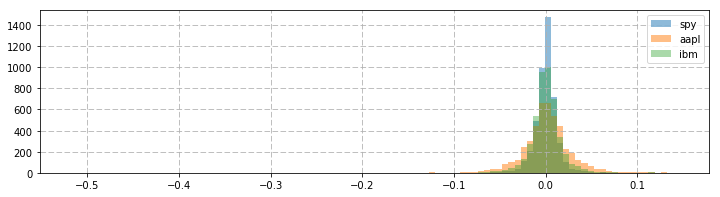

In [231]:
# overlay the histograms to compare return distributions
daily_returns['spy'].hist(label='spy', bins=100, range=[min, max], align='mid', alpha=0.5)
daily_returns['aapl'].hist(label='aapl', bins=100, range=[min, max], align='mid', alpha=0.5)
daily_returns['ibm'].hist(label='ibm', bins=100, range=[min, max], align='mid', alpha=0.4)
plt.legend()

y = 1.10x + 0.00
(alpha = 0.0010843457042202965)
(beta = 1.0995670541227014)


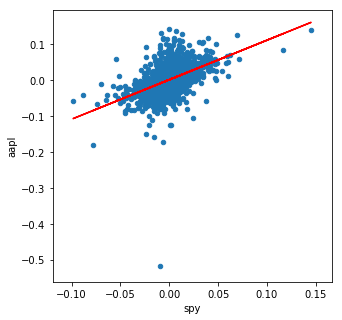

In [267]:
# the series to use to determine beta and alpha coeffecients
series = 'aapl'

# the series to benchmark returns against
benchmark = 'spy'

# create scatterplot
daily_returns.plot(kind='scatter', x=benchmark, y=series, figsize=(5,5))

# create linear regression plot of aapl vs spy
beta, alpha = np.polyfit(x=daily_returns[benchmark], y=daily_returns[series], deg=1)
plt.plot(daily_returns[benchmark], beta * daily_returns[benchmark] + alpha, linestyle='-', color='r')

print('y = {0:.2f}x + {1:.2f}'.format(beta, alpha))

print('(alpha = {})'.format(alpha))
print('(beta = {})'.format(beta))

y = 0.85x + 0.00
(alpha = 0.00011219252002719863)
(beta = 0.852070967247722)


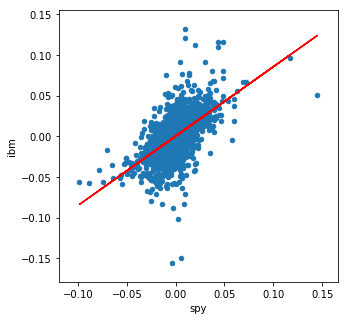

In [268]:
series = 'ibm'
benchmark = 'spy'

daily_returns.plot(kind='scatter', x=benchmark, y=series, figsize=(5,5))

beta, alpha = np.polyfit(x=daily_returns[benchmark], y=daily_returns[series], deg=1)
plt.plot(daily_returns[benchmark], beta * daily_returns[benchmark] + alpha, linestyle='-', color='r')

print('y = {0:.2f}x + {1:.2f}'.format(beta, alpha))

print('(alpha = {})'.format(alpha))
print('(beta = {})'.format(beta))

In [269]:
# review correlations of the series
daily_returns.corr(method='pearson')

,spy,aapl,ibm
spy,1.000000,0.498219,0.611900
aapl,0.498219,1.000000,0.403963
ibm,0.611900,0.403963,1.000000
